<a href="https://colab.research.google.com/github/temptitle/SquareDetection/blob/master/image_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from skimage.measure import compare_ssim
import imutils
import cv2
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline



In [66]:
imageA = cv2.imread('/content/sample_data/jeff.jpg')
imageB = cv2.imread('/content/sample_data/mask_jeff2.jpg')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

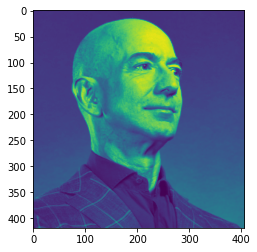

In [67]:
imshow(grayA)

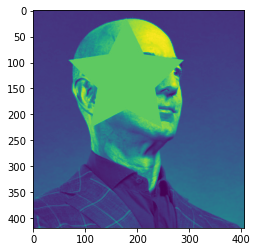

In [68]:
imshow(grayB)

In [69]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9082707755840933


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


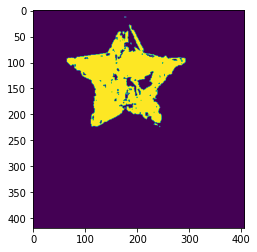

In [70]:
def normalize_data(data):
    min_data = np.min(data)
    max_data = np.max(data)

    if min_data == max_data:
        return np.zeros(data.shape)

    return (data - min_data) / (max_data - min_data)

thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh = normalize_data(thresh)
imshow(thresh)

In [71]:
# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
# 	cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)

# for c in cnts:
# 	# compute the bounding box of the contour and then draw the
# 	# bounding box on both input images to represent where the two
# 	# images differ
# 	(x, y, w, h) = cv2.boundingRect(c)
# 	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
# 	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

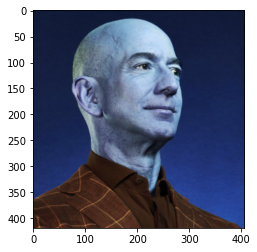

In [72]:
imshow(imageA)

In [104]:
def get_segment_crop(img,tol=0, mask=None):
  indexes = np.argwhere(thresh == 1)
  print(indexes.shape)
  output = img[np.where(indexes)[0]]
  return output

In [105]:
cropped_mask = get_segment_crop(grayA,tol=0, mask=thresh)
imshow(cropped_mask)

(18471, 2)


IndexError: ignored

In [75]:
import sys
np.set_printoptions(threshold=sys.maxsize)

diff.min()

(419, 407)

In [99]:
solutions = np.argwhere(thresh == 1)
print(len(thresh))

419


In [97]:
cropped_mask

array([[ 34,  35,  34,  34,  35,  34,  33,  33,  34,  34,  34,  35,  34,
         34,  34,  34,  34,  34,  34,  34,  33,  33,  34,  33,  34,  34,
         34,  34,  34,  35,  34,  34,  34,  33,  33,  33,  33,  34,  34,
         34,  34,  33,  33,  33,  34,  34,  33,  32,  33,  34,  34,  34,
         34,  35,  35,  34,  33,  33,  34,  35,  35,  35,  35,  35,  35,
         35,  35,  35,  35,  35,  35,  35,  34,  34,  34,  34,  34,  34,
         33,  33,  33,  33,  33,  33,  33,  33,  34,  34,  34,  33,  33,
         33,  34,  35,  35,  35,  34,  34,  32,  33,  34,  34,  34,  33,
         33,  33,  33,  34,  34,  34,  34,  34,  33,  33,  33,  33,  33,
         35,  34,  32,  35,  34,  34,  34,  35,  35,  45,  38,  34,  34,
         35,  34,  34,  34,  35,  36,  35,  35,  34,  34,  33,  33,  34,
         35,  35,  34,  34,  34,  34,  34,  34,  34,  34,  33,  34,  35,
         35,  34,  32,  33,  35,  35,  34,  34,  34,  34,  34,  34,  34,
         34,  34,  34,  34,  34,  34,  34,  34,  34